In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,  MaxPooling2D, Flatten,  Dropout, BatchNormalization

In [29]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

Data Exploration

In [30]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [31]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [32]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [33]:
y_train = y_train.reshape(-1, ) #don't want to change the 1st dimension so keep -1, and leave it blank
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [34]:
classes= ["airplane","automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [35]:
classes[9]

'truck'

In [36]:
def plot_sample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

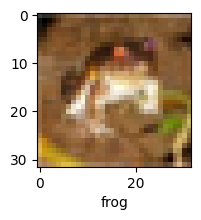

In [37]:
plot_sample(x_train, y_train, 0)

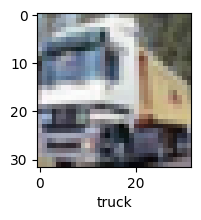

In [38]:
plot_sample(x_train, y_train, 1)

Normalize Data

In [39]:
x_train= x_train/255
x_test= x_test/255

#create CNN Model


In [40]:

model =Sequential()

model.add(Conv2D(32, kernel_size =(3,3), padding ='valid', activation ='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),  strides =2, padding ='valid'))

model.add(Conv2D(64, kernel_size =(3,3), padding ='valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),  strides =2, padding ='valid'))

model.add(Conv2D(128, kernel_size =(3,3), padding ='valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),  strides =2, padding ='valid'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation ='softmax'))


In [41]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                      

In [42]:
model.compile(optimizer= 'adam',  loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
history= model.fit(x_train, y_train, epochs =30)

Epoch 1/30
1563/1563 [==============================] - 12s 5ms/step - loss: 1.3609 - accuracy: 0.5156
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9792 - accuracy: 0.6561
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8190 - accuracy: 0.7118
Epoch 4/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7105 - accuracy: 0.7521
Epoch 5/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6271 - accuracy: 0.7809
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5616 - accuracy: 0.8014
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5007 - accuracy: 0.8251
Epoch 8/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4502 - accuracy: 0.8399
Epoch 9/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4020 - accuracy: 0.8560
Epoch 10/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.37

In [44]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3974 - accuracy: 0.7508


[1.3974157571792603, 0.7508000135421753]

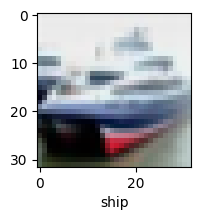

In [45]:
y_test =y_test.reshape(-1)
plot_sample(x_test, y_test, 1)

In [46]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.88280513e-04, 7.28200393e-06, 1.26316726e-01, 8.72710109e-01,
        1.27612486e-06, 7.22418845e-05, 6.02206332e-04, 6.48934204e-08,
        1.11089366e-06, 6.33850561e-07],
       [7.45472448e-08, 1.31594961e-05, 1.28149471e-13, 1.23649203e-15,
        3.26165980e-18, 4.71937640e-21, 5.07075630e-14, 2.37480048e-20,
        9.99986768e-01, 4.61824996e-08],
       [5.28415293e-02, 8.97379965e-02, 3.87356522e-06, 9.49729717e-09,
        1.39716976e-08, 5.66136527e-10, 1.23095365e-08, 4.65917749e-10,
        8.53214860e-01, 4.20169951e-03],
       [9.97012854e-01, 1.47127344e-06, 2.07141557e-08, 2.10824447e-09,
        2.87060349e-08, 1.83542070e-12, 1.33199931e-08, 5.96661219e-12,
        2.94324174e-03, 4.25068865e-05],
       [4.85182696e-16, 1.16729875e-15, 5.05828446e-08, 1.15208832e-06,
        1.15163075e-05, 1.46612006e-17, 9.99987245e-01, 1.37616371e-16,
        2.07273860e-08, 3.28872332e-14]], dtype=float32)

In [47]:
np.argmax([5,12,1,2])

1

In [48]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 8, 0, 6]

In [49]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [50]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

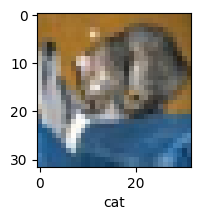

In [51]:
plot_sample(x_test, y_test, 0)

In [52]:
classes[y_classes[0]]

'cat'

<Axes: >

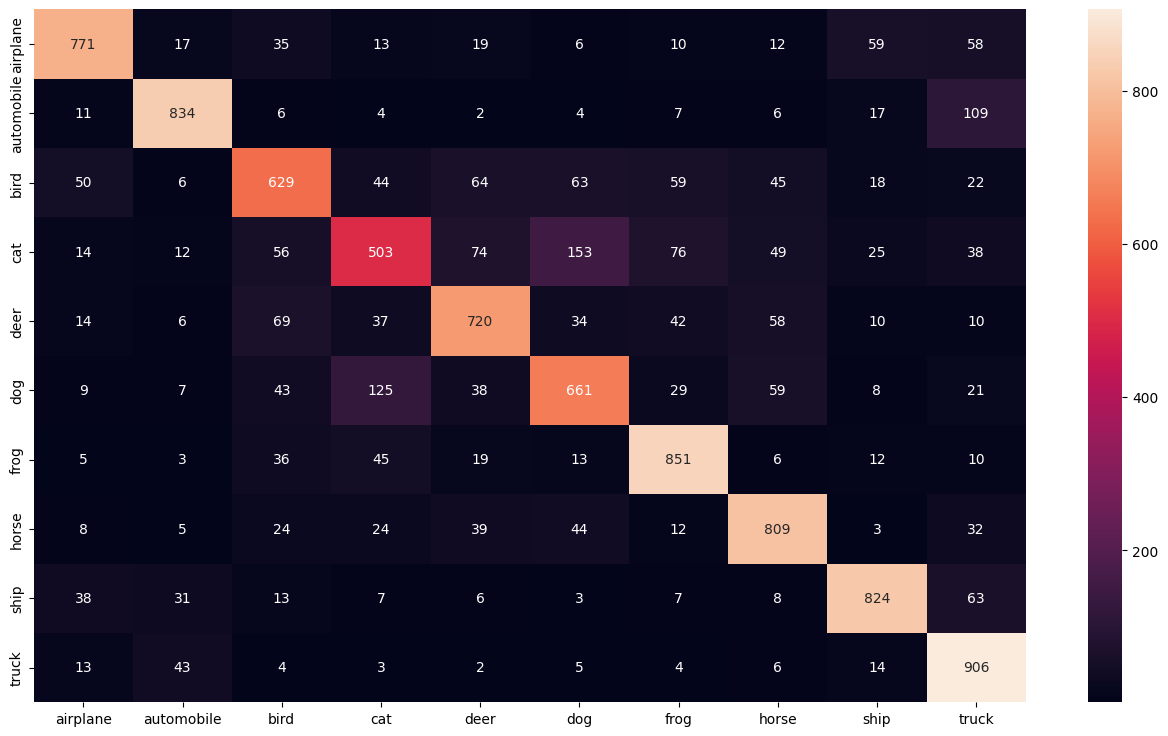

In [53]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels =[np.argmax(label) for label in y_pred]
cm= confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels =classes, yticklabels=classes)



In [54]:
from sklearn.metrics import classification_report
print("Classification Report: \n",  classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1000
           1       0.87      0.83      0.85      1000
           2       0.69      0.63      0.66      1000
           3       0.62      0.50      0.56      1000
           4       0.73      0.72      0.73      1000
           5       0.67      0.66      0.67      1000
           6       0.78      0.85      0.81      1000
           7       0.76      0.81      0.79      1000
           8       0.83      0.82      0.83      1000
           9       0.71      0.91      0.80      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

